# Introduction to PyTorch, a Deep Learning Library

## Checking GPU

In [1]:
import torch
print(f'{torch.cuda.is_available()=}')
print(f'{torch.cuda.device_count()=}')
print(f'{torch.cuda.current_device()=}')
print(f'{torch.cuda.get_device_name(torch.cuda.current_device())=}')
print(f'{torch.cuda.get_device_capability()=}')
print(f'{torch.cuda.get_device_properties(torch.cuda.current_device())=}')

torch.cuda.is_available()=True
torch.cuda.device_count()=1
torch.cuda.current_device()=0
torch.cuda.get_device_name(torch.cuda.current_device())='NVIDIA GeForce RTX 3060'
torch.cuda.get_device_capability()=(8, 6)
torch.cuda.get_device_properties(torch.cuda.current_device())=_CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12029MB, multi_processor_count=28, uuid=98296e77-6627-0015-8843-02f73d4ccdf4, L2_cache_size=2MB)


## Linear layer network

In [2]:
from torch import nn
input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])

# Create a linear layer
linear_layer = nn.Linear(
    in_features=3,
    out_features=2)

# Pass input_tensor through linear layer
output = linear_layer(input_tensor)
print(output)

tensor([[ 0.4906, -0.4656]], grad_fn=<AddmmBackward0>)


## Your first neural network 

In [3]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]])
# Create a container for stacking linear layers
model = nn.Sequential(nn.Linear(8, 4),
                      nn.Linear(4, 1))
output = model(input_tensor)
print(output)

tensor([[2.2474]], grad_fn=<AddmmBackward0>)


## Counting the number of parameters

In [4]:
model = nn.Sequential(nn.Linear(9, 4),
                      nn.Linear(4, 2),
                      nn.Linear(2, 1))
sum([p.numel() for p in model.parameters()])

53

# Neural Network Architecture and Hyperparameters

## The sigmoid and softmax functions

Create a sigmoid function and apply it on input_tensor to generate a probability for a binary classification task.

In [5]:
input_tensor = torch.tensor([[2.4]])
# Create a sigmoid function and apply it on input_tensor
sigmoid = nn.Sigmoid()
probability = sigmoid(input_tensor)
print(probability)

tensor([[0.9168]])


Create a softmax function and apply it on input_tensor to generate a probability for a multi-class classification task.

In [6]:
input_tensor = torch.tensor([[1.0, -6.0, 2.5, -0.3, 1.2, 0.8]])
# Create a softmax function and apply it on input_tensor
softmax = nn.Softmax(dim=-1)
probabilities = softmax(input_tensor)
print(probabilities)

tensor([[1.2828e-01, 1.1698e-04, 5.7492e-01, 3.4961e-02, 1.5669e-01, 1.0503e-01]])


## Building a binary classifier in PyTorch

* Create a neural network that takes a 1x8 tensor as input and outputs a single value for binary classification.
* Pass the output of the linear layer to a sigmoid to produce a probability.

In [7]:
input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])
# Implement a small neural network for binary classification
model = nn.Sequential(
  nn.Linear(8,1),
  nn.Sigmoid())
output = model(input_tensor)
print(output)

tensor([[0.5335]], grad_fn=<SigmoidBackward0>)


## From regression to multi-class classification

Create a 4-layer linear network that takes 11 input features from input_tensor and produces a single regression output.

In [8]:
input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])
# Implement a neural network with exactly four linear layers
model = nn.Sequential(
  nn.Linear(11,11),
  nn.Linear(11,11),
  nn.Linear(11,11),
  nn.Linear(11,1))
output = model(input_tensor)
print(output)

tensor([[0.1768]], grad_fn=<AddmmBackward0>)


Update the network provided to perform a multi-class classification with four outputs.

In [9]:
input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])
# Update network below to perform a multi-class classification with four labels
model = nn.Sequential(
  nn.Linear(11, 20),
  nn.Linear(20, 12),
  nn.Linear(12, 6),
  nn.Linear(6, 4),
  nn.Softmax(dim=-1))
output = model(input_tensor)
print(output)

tensor([[0.4106, 0.2250, 0.1616, 0.2027]], grad_fn=<SoftmaxBackward0>)


## Creating one-hot encoded labels

* Manually one-hot encode the ground truth label y using the provided NumPy array and save it as one_hot_numpy.
* Use PyTorch to one-hot encode y and save it as one_hot_pytorch.

In [10]:
import numpy as np
import torch.nn.functional as F

y = 1
num_classes = 3
# Create the one-hot encoded vector using NumPy
one_hot_numpy = np.array([0,1,0])
# Create the one-hot encoded vector using PyTorch
one_hot_pytorch = F.one_hot(torch.tensor(y), num_classes=3)
print("One-hot vector using NumPy:", one_hot_numpy)
print("One-hot vector using PyTorch:", one_hot_pytorch)

One-hot vector using NumPy: [0 1 0]
One-hot vector using PyTorch: tensor([0, 1, 0])


## Calculating cross entropy loss

Create the one-hot encoded vector of the ground truth label y, with 4 features (one for each class), and assign it to one_hot_label.

In [11]:
from torch.nn import CrossEntropyLoss

y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])
# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), num_classes=4)

Create the cross entropy loss function and store it as criterion.

In [12]:
criterion = CrossEntropyLoss()

Calculate the cross entropy loss using the one_hot_label vector and the scores vector, by calling the loss_function you created.

In [13]:
# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(loss)

tensor(8.0619, dtype=torch.float64)


## Accessing the model parameters

* Access the weight parameter of the first linear layer.
* Access the bias parameter of the second linear layer.

In [14]:
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Linear(8, 2)                     )
# Access the weight of the first linear layer
weight_0 = model[0].weight
print("Weight of the first layer:", weight_0)
# Access the bias of the second linear layer
bias_1 = model[1].bias
print("Bias of the second layer:", bias_1)

Weight of the first layer: Parameter containing:
tensor([[-0.1161, -0.1069,  0.0501,  0.0906, -0.0890, -0.1346, -0.2064, -0.0218,
          0.1172,  0.2490, -0.0881, -0.0640, -0.0323,  0.1147, -0.1973, -0.0303],
        [-0.1568,  0.2272,  0.1784, -0.2005, -0.1163, -0.0813, -0.1004, -0.1978,
          0.1658, -0.1336,  0.0271,  0.1607, -0.1330,  0.0210, -0.2316, -0.0828],
        [-0.1706, -0.1272, -0.0136,  0.0128, -0.0507,  0.0900,  0.1022,  0.2342,
          0.1173,  0.0245,  0.0520,  0.0473,  0.0349,  0.1384,  0.2441, -0.2250],
        [ 0.0950,  0.0321,  0.1646, -0.0119, -0.1167, -0.0131, -0.1455, -0.2087,
          0.0446, -0.0676,  0.2409,  0.1338, -0.0535, -0.0624, -0.1875,  0.0012],
        [ 0.1948, -0.1375, -0.1034, -0.2344,  0.2127,  0.0889, -0.0700,  0.2228,
          0.2394, -0.1671, -0.0480,  0.1769, -0.0035,  0.0597,  0.1529,  0.0152],
        [-0.0911,  0.1576, -0.0916,  0.0318,  0.1702,  0.2163, -0.1061, -0.1831,
          0.2420,  0.1429, -0.0926, -0.0710,  0.1090,  

## Updating the weights manually

Creating the model and calculate gradients that the course didn't provide

In [15]:
# Run a forward pass
sample = torch.tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160, -2.1152,
                         0.3223, -1.2633,  0.3500,  0.3081,  0.1198,  1.2377,  1.1168, -0.2473]])
target = torch.tensor([[1., 0.]])
model = nn.Sequential(nn.Linear(in_features=16, out_features=8, bias=True),
                      nn.Linear(in_features=8, out_features=4, bias=True),
                      nn.Linear(in_features=4, out_features=2, bias=True))
prediction = model(sample)

# Calculate the loss and gradients
criterion = CrossEntropyLoss()
loss = criterion(prediction, target)
loss.backward()

* Create the gradient variables by accessing the local gradients of each weight tensor.

In [16]:
weight0 = model[0].weight
weight1 = model[1].weight
weight2 = model[2].weight

# Access the gradients of the weight of each linear layer
grads0 = weight0.grad
grads1 = weight1.grad
grads2 = weight2.grad

* Update the weights using the gradients scaled by the learning rate.

In [17]:
# Update the weights using the learning rate and the gradients
lr = 0.001
weight0 = weight0 - lr * grads0
weight1 = weight1 - lr * grads1
weight2 = weight2 - lr * grads2

## Using the PyTorch optimizer

A neural network has been created and provided as the model variable. This model was used to run a forward pass and create the tensor of predictions pred. The one-hot encoded tensor is named target and the cross entropy loss function is stored as criterion. 

In [18]:
sample = torch.tensor([[-0.4366,  0.5472, -0.0548, -1.2576,  0.0348,  0.2104,  1.0398,  1.1759,
                  -0.9359,  0.1180,  0.1164, -1.5253,  1.1035,  0.9738,  0.5884,  0.9601]])
model = nn.Sequential(nn.Linear(in_features=16, out_features=8, bias=True),
                      nn.Linear(in_features=8, out_features=4, bias=True),
                      nn.Linear(in_features=4, out_features=2, bias=True))
pred = model(sample)

target = torch.tensor([[1., 0.]])

Use optim to create an SGD optimizer with a learning rate of your choice (must be less than one) for the model provided.

In [19]:
# Create the optimizer
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [20]:
# loss calculation and Backwards pass
criterion = CrossEntropyLoss()
loss = criterion(pred, target)
loss.backward()

Update the model's parameters using the optimizer.

In [21]:
optimizer.step()

# Training a Neural Network with PyTorch

## Using TensorDataset

In [22]:
import pandas as pd

animals = pd.DataFrame.from_dict(
    {
        "animal_name": {0: "sparrow", 1: "eagle", 2: "cat", 3: "dog", 4: "lizard"},
        "hair": {0: 0, 1: 0, 2: 1, 3: 1, 4: 0},
        "feathers": {0: 1, 1: 1, 2: 0, 3: 0, 4: 0},
        "eggs": {0: 1, 1: 1, 2: 0, 3: 0, 4: 1},
        "milk": {0: 0, 1: 0, 2: 1, 3: 1, 4: 0},
        "predator": {0: 0, 1: 1, 2: 1, 3: 0, 4: 1},
        "legs": {0: 2, 1: 2, 2: 4, 3: 4, 4: 4},
        "tail": {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
        "type": {0: 0, 1: 0, 2: 1, 3: 1, 4: 2},
    }
)

* Convert X and y into tensors and create a TensorDataset.
* Access and print the first sample.

In [23]:
import torch
from torch.utils.data import TensorDataset

X = animals.iloc[:, 1:-1].to_numpy()  
y = animals.iloc[:, -1].to_numpy()

# Create a dataset
dataset = TensorDataset(torch.tensor(X), torch.tensor(y))

# Print the first sample
input_sample, label_sample = dataset[0]
print('Input sample:', input_sample)
print('Label sample:', label_sample)

Input sample: tensor([0, 1, 1, 0, 0, 2, 1])
Label sample: tensor(0)


* Import the required module.
* Create a DataLoader using dataset, setting a batch size of two and enabling shuffling.
* Iterate through the DataLoader and print each batch of inputs and labels.

In [24]:
from torch.utils.data import DataLoader

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate over the dataloader
for batch_inputs, batch_labels in dataloader:
    print('batch_inputs:', batch_inputs)
    print('batch_labels:', batch_labels)

batch_inputs: tensor([[1, 0, 0, 1, 0, 4, 1],
        [0, 1, 1, 0, 1, 2, 1]])
batch_labels: tensor([1, 0])
batch_inputs: tensor([[0, 1, 1, 0, 0, 2, 1],
        [0, 0, 1, 0, 1, 4, 1]])
batch_labels: tensor([0, 2])
batch_inputs: tensor([[1, 0, 0, 1, 1, 4, 1]])
batch_labels: tensor([1])


## Using the MSELoss

* Calculate the MSE loss using NumPy.
* Create an MSE loss function using PyTorch.
* Convert y_pred and y to tensors, then calculate the MSE loss as mse_pytorch.

In [25]:
y_pred = np.array([3, 5.0, 2.5, 7.0])  
y = np.array([3.0, 4.5, 2.0, 8.0])     

# Calculate MSE using NumPy
mse_numpy = np.mean((y_pred - y)**2)

# Create the MSELoss function in PyTorch
criterion = nn.MSELoss()

# Calculate MSE using PyTorch
mse_pytorch = criterion(torch.tensor(y_pred), torch.tensor(y))

print("MSE (NumPy):", mse_numpy)
print("MSE (PyTorch):", mse_pytorch)

MSE (NumPy): 0.375
MSE (PyTorch): tensor(0.3750, dtype=torch.float64)


## Writing a training loop

The show_results() function is provided to help you visualize some sample predictions.

In [26]:
def show_results(model, dataloader):
    model.eval()
    iter_loader = iter(dataloader)
    for _ in range(3):
        feature, target = next(iter_loader)
        preds = model(feature)
        for p, t in zip(preds, target):
            print(f'Ground truth salary: {t.item():.3f}. Predicted salary: {p.item():.3f}.')

The following variables have been created:
* num_epochs, containing the number of epochs (set to 5)
* dataloader, containing the dataloader
* model, containing the neural network
* criterion, containing the loss function, nn.MSELoss()
* optimizer, containing the SGD optimizer

In [27]:
salaries = pd.read_csv('salaries.csv')
X = salaries.iloc[:, 1:-1].to_numpy(dtype='float32')
y = salaries.iloc[:, [-1]].to_numpy(dtype='float32')
dataset = TensorDataset(torch.tensor(X), torch.tensor(y))
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
num_epochs = 5
model = nn.Sequential(
    nn.Linear(in_features=4, out_features=2, bias=True),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1, bias=True)
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

* Write a for loop that iterates over the dataloader; this should be nested within a for loop that iterates over a range equal to the number of epochs.
* Set the gradients of the optimizer to zero.

In [28]:
# Loop over the number of epochs and the dataloader
for i in range(num_epochs):
    for data in dataloader:
        # Set the gradients to zero
        optimizer.zero_grad()
        # Run a forward pass
        feature, target = data
        # print(f'{feature.shape=} {target.shape=}', end=' ')
        prediction = model(feature)
        # print(f'{prediction.shape=}')
        # Compute the loss
        loss = criterion(prediction, target)
        # Compute the gradients
        loss.backward()
        # Update the model's parameters
        optimizer.step()
print(f'{loss=}')
show_results(model, dataloader)

loss=tensor(0.0453, grad_fn=<MseLossBackward0>)
Ground truth salary: 0.005. Predicted salary: 0.058.
Ground truth salary: 0.159. Predicted salary: 0.075.
Ground truth salary: 0.194. Predicted salary: 0.106.
Ground truth salary: 0.183. Predicted salary: -0.015.
Ground truth salary: 0.126. Predicted salary: 0.062.
Ground truth salary: 1.000. Predicted salary: 0.117.
Ground truth salary: 0.120. Predicted salary: 0.043.
Ground truth salary: 0.050. Predicted salary: 0.007.
Ground truth salary: 0.312. Predicted salary: 0.062.
Ground truth salary: 0.131. Predicted salary: 0.077.
Ground truth salary: 0.128. Predicted salary: -0.015.
Ground truth salary: 0.177. Predicted salary: 0.040.


## Implementing ReLU

In [29]:
# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

x_pos = torch.tensor(2.0)
x_neg = torch.tensor(-3.0)

# Apply the ReLU function to the tensors
output_pos = relu_pytorch(x_pos)
output_neg = relu_pytorch(x_neg)

print("ReLU applied to positive value:", output_pos)
print("ReLU applied to negative value:", output_neg)

ReLU applied to positive value: tensor(2.)
ReLU applied to negative value: tensor(0.)


## Implementing leaky ReLU

In [30]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


## Experimenting with learning rate

In this exercise, your goal is to find the optimal learning rate such that the optimizer can find the minimum of the non-convex function
$x^4 + x^3 - 5x^2$ in ten steps.

In [31]:
def function(x):
    return x**4 + x**3 - 5 * x**2

You will experiment with three different learning rate values. For this problem, try learning rate values between 0.001 to 0.1.

You are provided with the optimize_and_plot() function that takes the learning rate for the first argument. This function will run 10 steps of the SGD optimizer and display the results.

In [32]:
import matplotlib.pyplot as plt
def optimize_and_plot(lr=0.01, momentum=0.0):

    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []
    for i in range(10):

        y = function(x)
        # values.append((x.clone(), y.clone()))
        # work-around previous line
        values.append((x.clone().detach(), y.clone().detach()))
        y.backward()

        d_p = x.grad.data
        if momentum != 0:
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer

        x.data.add_(d_p, alpha=-lr)
        x.grad.zero_()

    x = np.arange(-3, 2, 0.001)
    y = function(x)

    plt.figure(figsize=(10, 5))
    plt.plot(
        [v[0].detach().numpy() for v in values],
        [v[1].detach().numpy() for v in values],
        "r-X",
        linewidth=2,
        markersize=7,
    )
    for i in range(10):
        plt.text(values[i][0] + 0.1, values[i][1], f"step {i}", fontdict={"color": "r"})
    plt.plot(x, y, linewidth=2)
    plt.grid()
    plt.tick_params(axis="both", which="major", labelsize=12)
    plt.legend(["Optimizer steps", "Square function"])
    plt.show()

Try a small learning rate value such that the optimizer isn't able to get past the first minimum on the right.

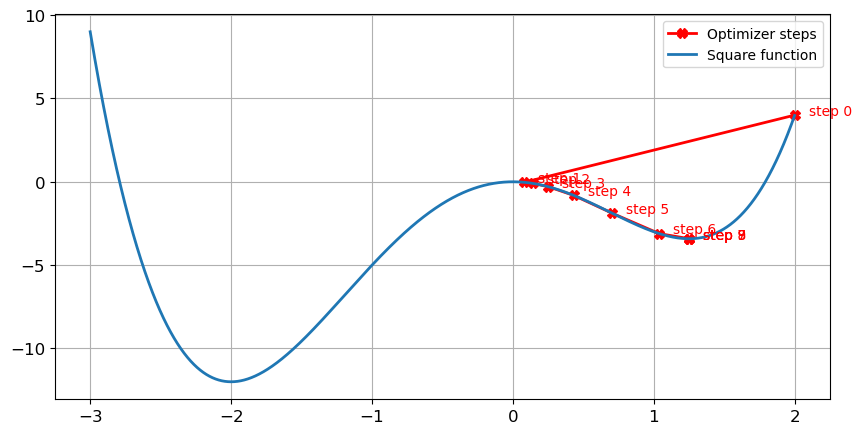

In [33]:
# Try a first learning rate value
lr0 = 0.08
optimize_and_plot(lr=lr0)

Try a large learning rate value such that the optimizer skips past the global minimum at -2.

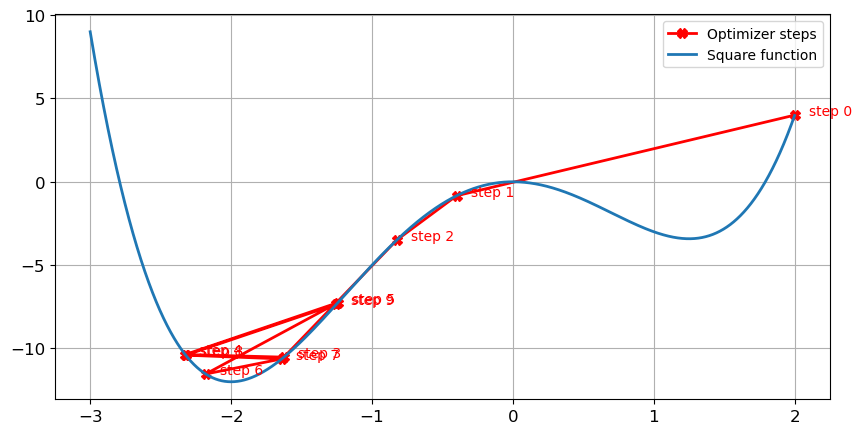

In [34]:
# Try a second learning rate value
lr1 = .1
optimize_and_plot(lr=lr1)

Based on the previous results, try a better learning rate value.

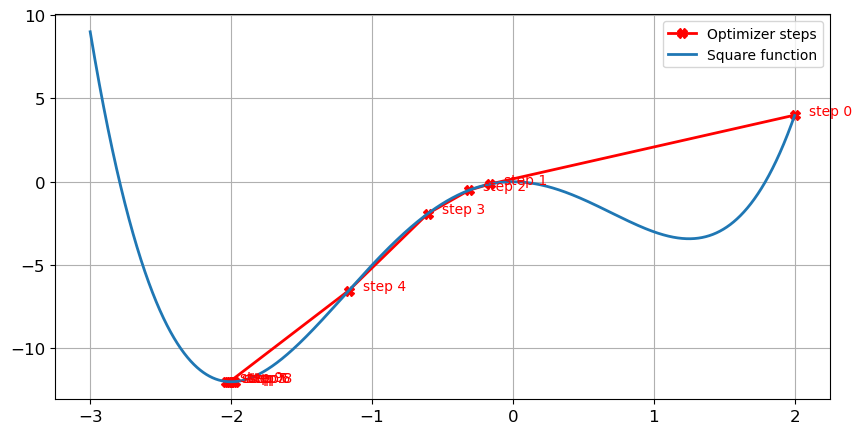

In [35]:
# Try a third learning rate value
lr2 = 0.09
optimize_and_plot(lr=lr2)

## Experimenting with momentum

In this exercise, your goal is to find the optimal momentum such that the optimizer can find the minimum of the following non-convex function $x^4 + x^3 - 5x^2$ in 20 steps. You will experiment with two different momentum values. For this problem, the learning rate is fixed at 0.01. 

You are provided with the optimize_and_plot() function that accepts as input the momentum parameter. This function will run 20 steps of the SGD optimizer and display the results.

In [36]:
def optimize_and_plot(lr=0.01, momentum=0.0):
    if lr > 0.05:
        raise ValueError("Choose a learning <= 0.05")
    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []
    for i in range(20):

        y = function(x)
        values.append((x.clone().detach(), y.clone().detach()))
        y.backward()

        d_p = x.grad.data
        if momentum != 0:
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer

        x.data.add_(d_p, alpha=-lr)
        x.grad.zero_()

    x = np.arange(-3, 2, 0.001)
    y = function(x)

    plt.figure(figsize=(10, 5))
    plt.plot(
        [v[0].detach().numpy() for v in values],
        [v[1].detach().numpy() for v in values],
        "r-X",
        linewidth=2,
        markersize=7,
    )
    for i in range(20):
        plt.text(values[i][0] + 0.1, values[i][1], f"step {i}", fontdict={"color": "r"})
    plt.plot(x, y, linewidth=2)
    plt.grid()
    plt.tick_params(axis="both", which="major", labelsize=12)
    plt.legend(["Optimizer steps", "Square function"])
    plt.show()

Try a first value for the momentum such that the optimizer gets stuck in the first minimum.

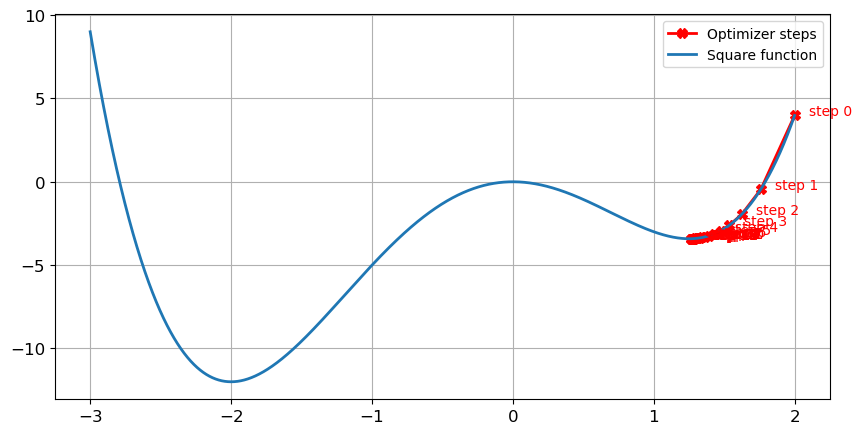

In [37]:
# Try a first value for momentum
mom0 = 0
optimize_and_plot(momentum=mom0)

Try a second value for the momentum such that the optimizer finds the global optimum.

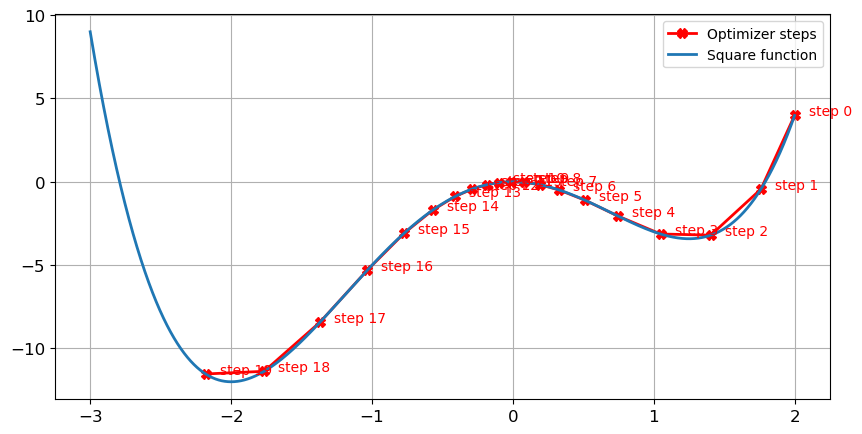

In [38]:
# Try a second value for momentum
mom1 = 0.92
optimize_and_plot(momentum=mom1)

> Momentum and learning rate are critical to the training of your neural network. A good rule of thumb is to start with a learning rate of 0.001 and a momentum of 0.95.

# Evaluating and Improving Models

## Freeze layers of a model

You are about to fine-tune a model on a new task after loading pre-trained weights. The model contains three linear layers. However, because your dataset is small, you only want to train the last linear layer of this model and freeze the first two linear layers.

The model has already been created and exists under the variable model. You will be using the named_parameters method of the model to list the parameters of the model. Each parameter is described by a name. This name is a string with the following naming convention: x.name where x is the index of the layer.

Remember that a linear layer has two parameters: the weight and the bias.

In [39]:
model = nn.Sequential(
    nn.Linear(in_features=8, out_features=16, bias=True),
    nn.Linear(in_features=16, out_features=32, bias=True),
    nn.Linear(in_features=32, out_features=10, bias=True))

In [40]:
for name, param in model.named_parameters():
    # Check if the parameters belong to the first layer
    if name == "0.weight":
        # Freeze the parameters
        param.requires_grad = False
    # Check if the parameters belong to the second layer
    if name == "1.weight":
        # Freeze the parameters
        param.requires_grad = False

## Layer initialization

In [41]:
layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

# Use uniform initialization for layer0 and layer1 weights
nn.init.uniform_(layer0.weight)
nn.init.uniform_(layer1.weight)

model = nn.Sequential(layer0, layer1)

## Writing the evaluation loop

In this exercise, you will write an evaluation loop to compute validation loss. The evaluation loop follows a similar structure to the training loop but without gradient calculations or weight updates.

model, validationloader, and loss function criterion have already been defined to handle predictions, data loading, and loss calculation.

In [42]:
# recreating the exercise model datacamp didn't provide
from torchvision.transforms import Normalize
model = nn.Sequential(
    Normalize(
        mean=[0.51378129, 0.44999619, 0.42258797],
        std=[0.25081163, 0.24213039, 0.24616128],
    ),
    nn.Flatten(start_dim=1, end_dim=-1),
    nn.Linear(in_features=3072, out_features=3, bias=True),
)
# recreating the validation dataset datacamp didn't provide
X = pd.read_csv('chapter4_evaluation_loop_dataset_X.csv', dtype='float32').values.reshape(71,3,32,32)
y = pd.read_csv('chapter4_evaluation_loop_dataset_y.csv', dtype='float32').values
valdataset = TensorDataset(torch.tensor(X), torch.tensor(y))
# recreating a DataLoader datacamp didn't provide
validationloader = DataLoader(valdataset, batch_size=1, shuffle=True)
criterion = CrossEntropyLoss()

* Set the model to evaluation mode.
* Sum the current batch loss to the validation_loss variable.
* Calculate the mean loss value for the epoch.
* Set the model back to training mode.

In [43]:
# Set the model to evaluation mode
model.eval()
validation_loss = 0.0

with torch.no_grad():
  for features, labels in validationloader:
      outputs = model(features)
      loss = criterion(outputs, labels)
      # Sum the current loss to the validation_loss variable
      validation_loss += loss.item()
      
# Calculate the mean loss value
validation_loss_epoch = validation_loss / len(validationloader)
print(validation_loss_epoch)

# Set the model back to training mode
model.train()

1.4624017124444666


Sequential(
  (0): Normalize(mean=[0.51378129, 0.44999619, 0.42258797], std=[0.25081163, 0.24213039, 0.24616128])
  (1): Flatten(start_dim=1, end_dim=-1)
  (2): Linear(in_features=3072, out_features=3, bias=True)
)

## Calculating accuracy using torchmetrics

Tracking accuracy during training helps identify the best-performing epoch.

In this exercise, you'll use torchmetrics to calculate accuracy on a facemask dataset with three classes. The plot_errors function will highlight misclassified samples, helping you analyze model errors.

torchmetrics package is already imported. Model outputs are softmax probabilities, and labels are one-hot encoded vector

In [44]:
dataloader = DataLoader(valdataset, batch_size=1, shuffle=True)

In [45]:
from mpl_toolkits.axes_grid1 import ImageGrid
def plot_errors(model, dataloader): 
    # find mismatches
    mismatches = []
    for data in dataloader:
        if len(mismatches) > 8:
            break
        features, labels = data
        outputs = model(features)
        gt = labels.argmax(-1)
        pred = outputs.argmax(-1)
        for f, g, p in zip(features, gt, pred):
            if g != p:
                mismatches.append((f, g, p))
    
    
    fig = plt.figure(figsize=(8, 8))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(2, 4),  # creates 2x2 grid of axes
                     axes_pad=0.5,  # pad between axes in inch.
                     )
    mapping = {0: 'No mask', 1: 'Mask', 2: 'Incorrect'}
    for idx, ax in enumerate(grid):
        ax.imshow(mismatches[idx][0].permute(1, 2, 0))
        ax.set_title(f'GT: {mapping[mismatches[idx][1].item()]} \n PRED: {mapping[mismatches[idx][2].item()]}')
        ax.axis('off')
    plt.show()

/home/mauricio/miniconda3/envs/dev/lib/python3.12/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


Accuracy on all data: 0.15492957830429077


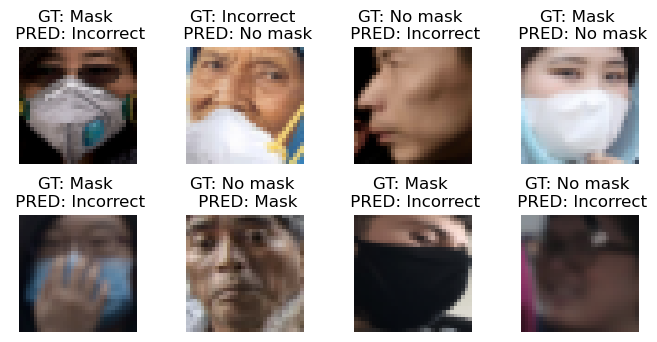

In [46]:
import torchmetrics
# Create accuracy metric
metric = torchmetrics.Accuracy(task='multiclass', num_classes=3)
for features, labels in dataloader:
    outputs = model(features)
    # Calculate accuracy over the batch
    # (keeping argmax for one-hot labels)
    metric.update(outputs, labels.argmax(dim=-1))
# Calculate accuracy over the whole epoch
accuracy = metric.compute()
print(f"Accuracy on all data: {accuracy}")
# Reset metric for the next epoch
metric.reset()
plot_errors(model, dataloader)

## Experimenting with dropout

Dropout helps prevent overfitting by randomly setting some output values to zero during training. In this exercise, you'll build a simple neural network with dropout and observe how it behaves in training and evaluation modes.

torch.nn package is preloaded as nn, and features is already defined for you.

In [47]:
features = torch.randn((1, 8))
print(features.numpy())

[[-1.0137436   0.39073732  0.13375203 -1.607832   -0.6986631  -0.7432301
  -0.6056541   0.14528863]]


* Add a dropout layer to the model with a 50% probability of zeroing out elements.
* Set the model to training mode and generate predictions using features, storing the output as output_train.

In [48]:
# Model with Dropout
model = nn.Sequential(
    nn.Linear(8, 6),
    nn.Linear(6, 4),
    nn.Dropout(p=0.5))
# Forward pass in training mode (Dropout active)
model.train()
output_train = model(features)
print(output_train.detach().numpy())

[[ 0.          0.3790476  -0.10633576 -0.        ]]


* Set the model to evaluation mode to disable dropout.
* Generate predictions using features, storing the output as output_eval.

In [49]:
# Forward pass in evaluation mode (Dropout disabled)
model.eval()
output_eval = model(features)

# Print results
print("Output in train mode:", output_train)
print("Output in eval mode:", output_eval)

Output in train mode: tensor([[ 0.0000,  0.3790, -0.1063, -0.0000]], grad_fn=<MulBackward0>)
Output in eval mode: tensor([[ 0.1090,  0.1895, -0.0532, -0.0147]], grad_fn=<AddmmBackward0>)


## Implementing random search

Hyperparameter search is a computationally costly approach to experiment with different hyperparameter values. However, it can lead to performance improvements. In this exercise, you will implement a random search algorithm.

You will randomly sample 10 values of the learning rate and momentum from the uniform distribution. To do so, you will use the np.random.uniform() function.

numpy package has already been imported as np, and a plot_hyperparameter_search() function has been created to visualize your results.

In [50]:
def plot_hyperparameter_search(values):
    lrs, momentums = zip(*values)

    plt.figure(figsize=(8, 6))
    plt.scatter(lrs, momentums)
    plt.xscale("log")  # Use log scale for learning rate
    plt.xlabel("Learning Rate")
    plt.ylabel("Momentum")
    # plt.title("Randomly Sampled Learning Rates and Momentum")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Set specific tick marks on the x-axis
    plt.xticks([10**-2, 10**-3, 10**-4], 
               [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$'])

    plt.show()

Randomly sample a learning rate factor between 2 and 4 so that the learning rate (lr) is bounded between and
.
Randomly sample a momentum between 0.85 and 0.99.

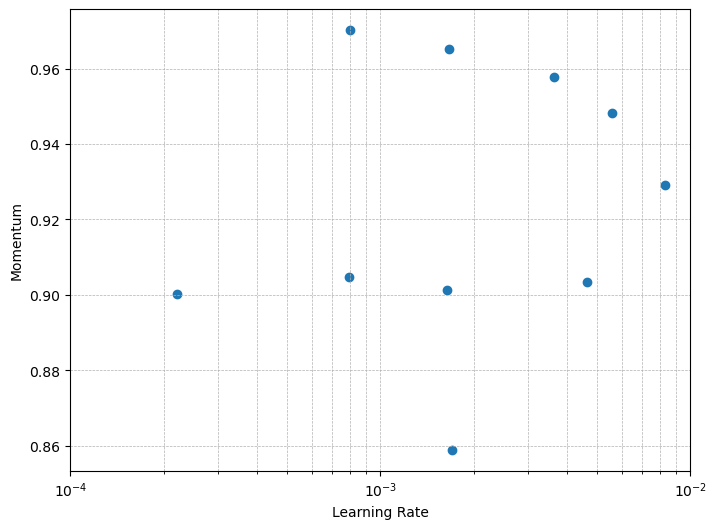

In [51]:
values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 2 and 4
    factor = np.random.uniform(2,4)
    lr = 10 ** -factor
    # Randomly select a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85, 0.99)
    values.append((lr, momentum))
  
plot_hyperparameter_search(values)